In [1]:
# Load necessary libraries
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)


In [2]:
morphDF = pd.read_csv('../data/Bahareh/morph_exp/morphFeat.csv')
morphDF

,Unnamed: 0,spatial_X,spatial_Y,Area,Area (µm^2),ImageID,ImageType,Parent,Distance to nearest Plaque (µm),ImageID_CellID,...,ramification_index,skewness,coefficient_of_determination,sholl_regression_coefficient,regression_intercept,Cell Area,Soma Radius,Convex Hull Area,Solidity,leiden
0,1790,13574.364621,11980.732852,277,61.1722,Ctl-3,Ctl,Grey Matter,348.1208,1796_1791,...,inf,-3.47,0.98,1.15,-1.35,495.0,6.000000,732.0,0.676230,3
1,1795,14676.054795,11854.070776,438,82.4693,Ctl-3,Ctl,Grey Matter,432.9919,1796_1796,...,1.04,0.52,0.97,0.13,-2.03,639.0,7.211102,856.0,0.746495,2
2,1796,13395.029412,11854.349790,952,185.9480,Ctl-3,Ctl,Grey Matter,303.5456,1796_1797,...,1.06,0.58,0.95,1.68,0.86,1453.0,8.000000,2475.0,0.587071,3
3,1797,15292.282609,11814.693237,828,171.9872,Ctl-3,Ctl,Grey Matter,353.9196,1796_1798,...,1.75,-0.10,0.83,1.03,-0.97,1362.0,7.810250,2522.0,0.540048,2
4,1798,14597.332335,11839.314371,1002,199.1936,Ctl-3,Ctl,Grey Matter,430.5695,1796_1799,...,1.37,-0.38,0.98,0.07,-2.05,1564.0,8.000000,3294.0,0.474803,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48141,143822,39.061981,18631.999447,1807,312.5692,Ctl-2,Ctl,White Matter,NaN,3628_19191,...,1.25,-0.56,0.93,1.44,0.25,2351.0,13.341664,3438.0,0.683828,6
48142,143908,22.827744,17536.643293,656,119.3568,Ctl-2,Ctl,White Matter,NaN,3628_19277,...,1.58,0.00,0.96,0.14,-1.61,914.0,11.000000,1360.0,0.672059,6
48143,143961,21.906494,16472.578355,1155,217.2068,Ctl-2,Ctl,White Matter,NaN,3628_19330,...,0.82,0.53,0.90,0.08,-2.00,1680.0,8.062258,3451.0,0.486815,6
48144,143982,39.883575,15885.947766,1589,269.7662,Ctl-2,Ctl,White Matter,NaN,3628_19351,...,1.04,-0.25,0.89,1.14,-0.90,2019.0,13.892444,2766.0,0.729935,6


In [3]:
morphDF.isna().sum()

Unnamed: 0                              0
spatial_X                               0
spatial_Y                               0
Area                                    0
Area (µm^2)                             0
ImageID                                 0
ImageType                               0
Parent                                  0
Distance to nearest Plaque (µm)     16800
ImageID_CellID                          0
numCellCentroids                        0
ImageIDOLD                              0
CellID                                  0
surface_area                            0
total_length                            0
avg_process_thickness                   0
convex_hull                             0
no_of_forks                             0
no_of_primary_branches                  0
no_of_secondary_branches                0
no_of_tertiary_branches                 0
no_of_quatenary_branches                0
no_of_terminal_branches                 0
avg_length_of_primary_branches    

In [4]:
aDta =ad.read_h5ad('../data/Bahareh/data/MGCells_FullObs.h5ad')

In [5]:
aDtaDF = aDta.obs.copy()
aDtaProtDF = pd.DataFrame(aDta.X, index = aDta.obs.ImageID_CellID, columns=aDta.var_names)

aDtaDF.index = aDtaDF.ImageID_CellID.values
morphDF.index = morphDF.ImageID_CellID.values
aDtaProtDF


,IBA1,TMEM119,CD74,CD14,CD163,CD68,CD11b,CD11c,HLA-DR,CD45
ImageID_CellID,,,,,,,,,,
1796_1791,0.754510,-0.865683,0.509757,-0.226676,-0.475639,1.057945,0.472775,-1.730088,-1.309533,-3.073348
1796_1795,0.685627,0.248893,1.371672,0.096386,-0.475639,0.055959,0.329966,-1.730088,-0.438159,-2.808611
1796_1796,0.451331,0.279166,1.323823,0.553832,-0.475639,1.207630,0.979056,-0.632260,1.273008,-0.441500
1796_1797,0.756510,0.670121,0.893439,0.453139,-0.475639,0.996812,0.272749,-1.730088,-0.371326,-2.029157
1796_1798,0.273164,0.491967,0.347947,0.832652,-0.452481,0.371410,0.271806,-0.963004,-0.107937,-0.014751
...,...,...,...,...,...,...,...,...,...,...
3628_19351,-0.146877,-0.532632,0.790963,-0.814353,-1.061742,1.692909,1.510062,-0.401208,1.409916,-0.143884
3628_19352,-0.188458,0.557596,0.480239,-0.707272,-0.081985,1.427294,0.658194,-0.491757,-0.040867,-0.038301
3628_19355,-1.073379,-0.856470,-0.176728,1.199608,0.777966,1.339626,0.016456,0.652230,0.387574,-0.846866


In [6]:
morphDFDup = morphDF.loc[aDtaDF.index]
morphDFDup

,Unnamed: 0,spatial_X,spatial_Y,Area,Area (µm^2),ImageID,ImageType,Parent,Distance to nearest Plaque (µm),ImageID_CellID,...,ramification_index,skewness,coefficient_of_determination,sholl_regression_coefficient,regression_intercept,Cell Area,Soma Radius,Convex Hull Area,Solidity,leiden
1796_1791,1790,13574.364621,11980.732852,277,61.1722,Ctl-3,Ctl,Grey Matter,348.1208,1796_1791,...,inf,-3.47,0.98,1.15,-1.35,495.0,6.000000,732.0,0.676230,3
1796_1795,1794,13491.046358,11876.990066,302,53.9108,Ctl-3,Ctl,Grey Matter,308.6889,1796_1795,...,inf,NaN,1.00,1.00,-1.14,412.0,9.219544,435.0,0.947126,3
1796_1796,1795,14676.054795,11854.070776,438,82.4693,Ctl-3,Ctl,Grey Matter,432.9919,1796_1796,...,1.04,0.52,0.97,0.13,-2.03,639.0,7.211102,856.0,0.746495,2
1796_1797,1796,13395.029412,11854.349790,952,185.9480,Ctl-3,Ctl,Grey Matter,303.5456,1796_1797,...,1.06,0.58,0.95,1.68,0.86,1453.0,8.000000,2475.0,0.587071,3
1796_1798,1797,15292.282609,11814.693237,828,171.9872,Ctl-3,Ctl,Grey Matter,353.9196,1796_1798,...,1.75,-0.10,0.83,1.03,-0.97,1362.0,7.810250,2522.0,0.540048,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628_19351,143982,39.883575,15885.947766,1589,269.7662,Ctl-2,Ctl,White Matter,NaN,3628_19351,...,1.04,-0.25,0.89,1.14,-0.90,2019.0,13.892444,2766.0,0.729935,6
3628_19352,143983,331.334215,15758.689594,1134,204.2505,Ctl-2,Ctl,White Matter,NaN,3628_19352,...,0.87,0.57,0.94,0.07,-2.26,1560.0,12.000000,2340.0,0.666667,2
3628_19355,143986,140.715271,15603.225616,1015,172.7699,Ctl-2,Ctl,White Matter,NaN,3628_19355,...,1.58,0.36,0.91,0.11,-2.05,1295.0,13.152946,1703.0,0.760423,1
3628_19356,143987,129.878453,15529.645304,1810,347.2530,Ctl-2,Ctl,White Matter,NaN,3628_19356,...,1.30,-0.02,0.96,0.06,-2.11,2689.0,11.401754,5581.0,0.481813,6


In [7]:
morphDFDup.columns

Index(['Unnamed: 0', 'spatial_X', 'spatial_Y', 'Area', 'Area (µm^2)',
       'ImageID', 'ImageType', 'Parent', 'Distance to nearest Plaque (µm)',
       'ImageID_CellID', 'numCellCentroids', 'ImageIDOLD', 'CellID',
       'surface_area', 'total_length', 'avg_process_thickness', 'convex_hull',
       'no_of_forks', 'no_of_primary_branches', 'no_of_secondary_branches',
       'no_of_tertiary_branches', 'no_of_quatenary_branches',
       'no_of_terminal_branches', 'avg_length_of_primary_branches',
       'avg_length_of_secondary_branches', 'avg_length_of_tertiary_branches',
       'avg_length_of_quatenary_branches', 'avg_length_of_terminal_branches',
       'critical_radius', 'critical_value', 'enclosing_radius',
       'ramification_index', 'skewness', 'coefficient_of_determination',
       'sholl_regression_coefficient', 'regression_intercept', 'Cell Area',
       'Soma Radius', 'Convex Hull Area', 'Solidity', 'leiden'],
      dtype='object')

In [8]:
aDta.obs

,spatial_X,spatial_Y,Area,Area (µm^2),ImageID,ImageType,Parent,Distance to nearest Plaque (µm),ImageID_CellID,numCellCentroids,leiden
1790,13574.364621,11980.732852,277,61.1722,1796,Ctl,Grey Matter,348.1208,1796_1791,1.0,3
1794,13491.046358,11876.990066,302,53.9108,1796,Ctl,Grey Matter,308.6889,1796_1795,1.0,3
1795,14676.054795,11854.070776,438,82.4693,1796,Ctl,Grey Matter,432.9919,1796_1796,1.0,2
1796,13395.029412,11854.349790,952,185.9480,1796,Ctl,Grey Matter,303.5456,1796_1797,1.0,3
1797,15292.282609,11814.693237,828,171.9872,1796,Ctl,Grey Matter,353.9196,1796_1798,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
143982,39.883575,15885.947766,1589,269.7662,3628,Ctl,White Matter,NaN,3628_19351,1.0,6
143983,331.334215,15758.689594,1134,204.2505,3628,Ctl,White Matter,NaN,3628_19352,1.0,2
143986,140.715271,15603.225616,1015,172.7699,3628,Ctl,White Matter,NaN,3628_19355,1.0,1
143987,129.878453,15529.645304,1810,347.2530,3628,Ctl,White Matter,NaN,3628_19356,1.0,6


In [123]:

morphDFDup['no_of_branches'] = morphDFDup[['no_of_primary_branches', 'no_of_secondary_branches',
       'no_of_tertiary_branches', 'no_of_quatenary_branches',
       'no_of_terminal_branches', ]].sum(axis=1)
morphDFDup['avg_length_of_branches'] = (
    morphDFDup['no_of_primary_branches'] * morphDFDup['avg_length_of_primary_branches'] +
    morphDFDup['no_of_secondary_branches'] * morphDFDup['avg_length_of_secondary_branches'] +
    morphDFDup['no_of_tertiary_branches'] * morphDFDup['avg_length_of_tertiary_branches'] +
    morphDFDup['no_of_quatenary_branches'] * morphDFDup['avg_length_of_quatenary_branches'] +
    morphDFDup['no_of_terminal_branches'] * morphDFDup['avg_length_of_terminal_branches']
) / morphDFDup['no_of_branches']

morphDFDup['avg_length_of_branches'] = morphDFDup.avg_length_of_branches.fillna(0)


In [124]:
morphDFDup

,Unnamed: 0,spatial_X,spatial_Y,Area,Area (µm^2),ImageID,ImageType,Parent,Distance to nearest Plaque (µm),ImageID_CellID,...,coefficient_of_determination,sholl_regression_coefficient,regression_intercept,Cell Area,Soma Radius,Convex Hull Area,Solidity,leiden,no_of_branches,avg_length_of_branches
1796_1791,1790,13574.364621,11980.732852,277,61.1722,Ctl-3,Ctl,Grey Matter,348.1208,1796_1791,...,0.98,1.15,-1.35,495.0,6.000000,732.0,0.676230,3,0.0,0.000000
1796_1795,1794,13491.046358,11876.990066,302,53.9108,Ctl-3,Ctl,Grey Matter,308.6889,1796_1795,...,1.00,1.00,-1.14,412.0,9.219544,435.0,0.947126,3,0.0,0.000000
1796_1796,1795,14676.054795,11854.070776,438,82.4693,Ctl-3,Ctl,Grey Matter,432.9919,1796_1796,...,0.97,0.13,-2.03,639.0,7.211102,856.0,0.746495,2,5.0,13.980000
1796_1797,1796,13395.029412,11854.349790,952,185.9480,Ctl-3,Ctl,Grey Matter,303.5456,1796_1797,...,0.95,1.68,0.86,1453.0,8.000000,2475.0,0.587071,3,11.0,13.800000
1796_1798,1797,15292.282609,11814.693237,828,171.9872,Ctl-3,Ctl,Grey Matter,353.9196,1796_1798,...,0.83,1.03,-0.97,1362.0,7.810250,2522.0,0.540048,2,17.0,13.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628_19351,143982,39.883575,15885.947766,1589,269.7662,Ctl-2,Ctl,White Matter,NaN,3628_19351,...,0.89,1.14,-0.90,2019.0,13.892444,2766.0,0.729935,6,11.0,14.727273
3628_19352,143983,331.334215,15758.689594,1134,204.2505,Ctl-2,Ctl,White Matter,NaN,3628_19352,...,0.94,0.07,-2.26,1560.0,12.000000,2340.0,0.666667,2,11.0,15.272727
3628_19355,143986,140.715271,15603.225616,1015,172.7699,Ctl-2,Ctl,White Matter,NaN,3628_19355,...,0.91,0.11,-2.05,1295.0,13.152946,1703.0,0.760423,1,5.0,22.620000
3628_19356,143987,129.878453,15529.645304,1810,347.2530,Ctl-2,Ctl,White Matter,NaN,3628_19356,...,0.96,0.06,-2.11,2689.0,11.401754,5581.0,0.481813,6,35.0,11.877143


In [359]:
mDta = ad.AnnData(morphDFDup[[
       'total_length', 'avg_process_thickness', 
       'no_of_forks', 'no_of_branches','avg_length_of_branches','no_of_primary_branches','avg_length_of_primary_branches',
       'critical_radius', 'enclosing_radius',
        'Cell Area',
       'Soma Radius', 'Convex Hull Area', 'Solidity',]])

mDta.obs = morphDFDup[['spatial_X', 'spatial_Y', 'Area', 'Area (µm^2)',
       'ImageID', 'ImageType', 'Parent', 'Distance to nearest Plaque (µm)','no_of_primary_branches', 'no_of_secondary_branches',
       'no_of_tertiary_branches', 'no_of_quatenary_branches',
       'no_of_terminal_branches', 'avg_length_of_primary_branches',
       'avg_length_of_secondary_branches', 'avg_length_of_tertiary_branches',
       'avg_length_of_quatenary_branches', 'avg_length_of_terminal_branches',
       'ImageID_CellID', 'numCellCentroids', 'ImageIDOLD', 'CellID', 'coefficient_of_determination','critical_value', 
       'sholl_regression_coefficient', 'regression_intercept',
       'leiden']]
mDta

AnnData object with n_obs × n_vars = 48146 × 13
    obs: 'spatial_X', 'spatial_Y', 'Area', 'Area (µm^2)', 'ImageID', 'ImageType', 'Parent', 'Distance to nearest Plaque (µm)', 'no_of_primary_branches', 'no_of_secondary_branches', 'no_of_tertiary_branches', 'no_of_quatenary_branches', 'no_of_terminal_branches', 'avg_length_of_primary_branches', 'avg_length_of_secondary_branches', 'avg_length_of_tertiary_branches', 'avg_length_of_quatenary_branches', 'avg_length_of_terminal_branches', 'ImageID_CellID', 'numCellCentroids', 'ImageIDOLD', 'CellID', 'coefficient_of_determination', 'critical_value', 'sholl_regression_coefficient', 'regression_intercept', 'leiden'

In [362]:
sc.pp.scale(mDta)

In [363]:
mDta

AnnData object with n_obs × n_vars = 48146 × 13
    obs: 'spatial_X', 'spatial_Y', 'Area', 'Area (µm^2)', 'ImageID', 'ImageType', 'Parent', 'Distance to nearest Plaque (µm)', 'no_of_primary_branches', 'no_of_secondary_branches', 'no_of_tertiary_branches', 'no_of_quatenary_branches', 'no_of_terminal_branches', 'avg_length_of_primary_branches', 'avg_length_of_secondary_branches', 'avg_length_of_tertiary_branches', 'avg_length_of_quatenary_branches', 'avg_length_of_terminal_branches', 'ImageID_CellID', 'numCellCentroids', 'ImageIDOLD', 'CellID', 'coefficient_of_determination', 'critical_value', 'sholl_regression_coefficient', 'regression_intercept', 'leiden'
    var: 'mean', 'std'

In [364]:
mDtaNormDF = pd.DataFrame(mDta.X, index = mDta.obs.ImageID_CellID, columns=mDta.var_names)

In [365]:
mergedNormDF =pd.concat([aDtaProtDF, mDtaNormDF],axis=1)

In [131]:
mergedDF =pd.concat([aDtaProtDF, morphDFDup],axis=1)

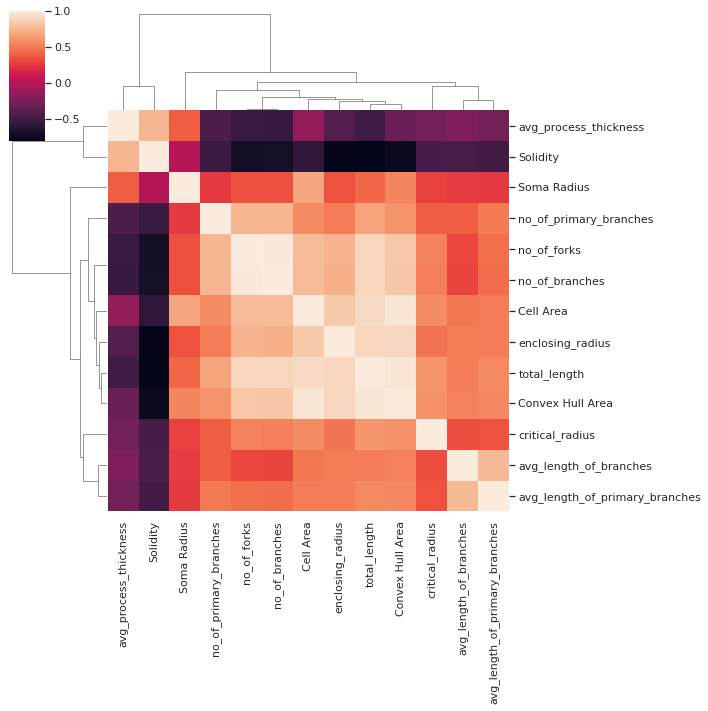

In [366]:
import seaborn as sns
sns.clustermap(mDtaNormDF.corr(method='spearman'))
#mergedNormDF.loc[mDta.obs[mDta.obs.numCellCentroids==1].index].corr(method='spearman')[mDtaNormDF.columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='no_of_primary_branches', ylabel='CD68'>

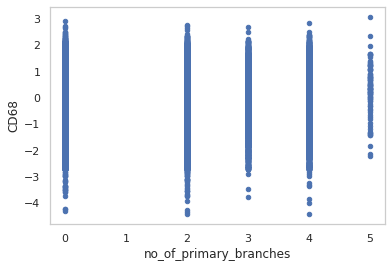

In [367]:
mergedDF.plot(x='no_of_primary_branches',y='CD68', kind='scatter')

In [368]:
sc.tl.pca(mDta, svd_solver='arpack') # peform PCA


In [369]:
sc.tl.tsne(mDta, perplexity=100)
# compute clustering phenotypes
# uses RapidsAI to speed-up the computation


In [370]:
# compute clustering phenotypes
# uses RapidsAI to speed-up the computation
import Bahareh.rapids_scanpy_funcs as rs

sc.pp.neighbors(mDta, n_neighbors=100, method='rapids') # Computing the neighborhood graph


In [371]:
sc.tl.umap(mDta, method='rapids') # Computing the neighborhood graph


In [372]:
mDta.obs['leidenM'] = rs.leiden(mDta, resolution=.1)
mDta.obs['leidenM1'] = rs.leiden(mDta, resolution=0.3)

<AxesSubplot:>

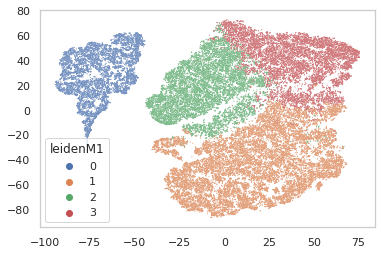

In [373]:

sns.scatterplot(data=mDta.obs, x=mDta.obsm['X_tsne'][:,0], y=mDta.obsm['X_tsne'][:,1],
                hue='leidenM1',s=1,)

<AxesSubplot:>

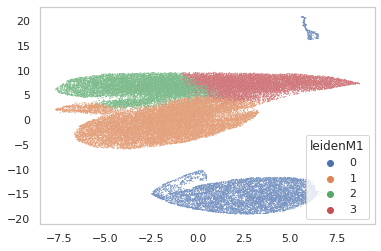

In [374]:
sns.scatterplot(data=mDta.obs, x=mDta.obsm['X_umap'][:,0], y=mDta.obsm['X_umap'][:,1],
                hue='leidenM1',s=1,)

In [375]:
## Plot AD statistics
dt = 'Distance to nearest Plaque (µm)'
ss = mDta[(mDta.obs.ImageType =='AD')]
ss = ss[ss.obs.Parent=='Grey Matter']
BINS  =[-1,0,5,10,15,20,30,50,75,100,200,500]
out = pd.cut(ss.obs[dt],bins=BINS, right=True)
ss.obs['Quantile'] = out.values

Trying to set attribute `.obs` of view, copying.


... storing 'ImageID' as categorical
... storing 'ImageType' as categorical
... storing 'Parent' as categorical


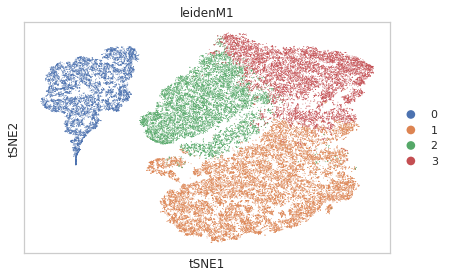

In [376]:
sc.pl.scatter(mDta,basis ='tsne', color='leidenM1')

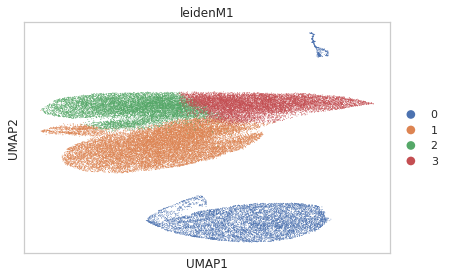

In [377]:
sc.pl.scatter(mDta,basis ='umap', color='leidenM1')

In [380]:

cMapDict = {ix:x for ix,x in enumerate(mDta.uns['leidenM1_colors'])}
cMapDict

{0: '#4c72b0', 1: '#dd8452', 2: '#55a868', 3: '#c44e52'}

In [385]:
mDta.obs.drop('no_of_primary_branches',axis=1, inplace=True)

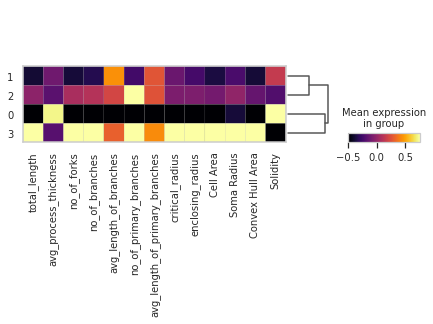

In [401]:
# Plot heatmap

sc.tl.dendrogram(mDta, groupby='leidenM1')
sc.pl.matrixplot(mDta, var_names = mDta.var_names,groupby='leidenM1', 
                 dendrogram=True, use_raw=False, cmap="inferno",standard_scale=None,vmin=-0.50,vmax=0.75, return_fig=False)

In [387]:
(mDta.obs.ImageID_CellID.values==aDta.obs.ImageID_CellID.values).sum()

48146

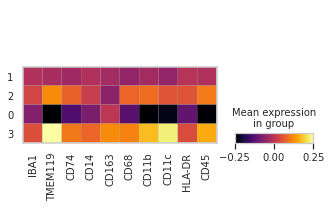

In [403]:
aDta.obs['leidenM1'] = mDta.obs.leidenM1.values
# Plot heatmap

#sc.tl.dendrogram(aDta, groupby='leidenM1')
sc.pl.matrixplot(aDta, var_names = aDta.var_names,groupby='leidenM1', categories_order=[1,2,0,3],
                 dendrogram=False, use_raw=False, cmap="inferno",
                 standard_scale=None,vmin=-0.25,vmax=0.25, return_fig=False)

In [390]:
def plotPie(adt, ax, axis_id, colName):
    count_DF  = adt.obs[adataScaled2.obs.Parent=='Grey Matter'].sample(frac=1)[colName].value_counts()
    keepOrder = count_DF.index
    labels = []
    for ix, x in count_DF.items():
        if (100.*x/count_DF.sum())>=1:
            labels.append("{:.2f}%".format(100.*x/count_DF.sum()))
        else:
            if  "< 1%" not in labels:
                labels.append("< 1%")
            else:
                labels.append("")
    ax[0][axis_id].pie(count_DF,explode=[0.05]*len(adt.obs[colName].unique()),pctdistance=-0.85,startangle=0,
            labels=labels, colors=[cMapDict[c] for c in keepOrder],
          textprops = {"fontsize":12})
    #plt.set_cmap('Set2')
    #draw circle
    centre_circle = plt.Circle((0,0),0.50,fc='white')
    #fig = plt.gcf()
    ax[0][axis_id].add_artist(centre_circle)
    plt.tight_layout()
    count_DF  = adt.obs[adt.obs.Parent=='White Matter'].sample(frac=1)[colName].value_counts()
    keepOrder = count_DF.index
    labels = []
    for ix, x in count_DF.items():
        if (100.*x/count_DF.sum())>=1:
            labels.append("{:.2f}%".format(100.*x/count_DF.sum()))
        else:
            if  "< 1%" not in labels:
                labels.append("< 1%")
            else:
                labels.append("")
    ax[1][axis_id].pie(count_DF.loc[keepOrder],explode=[0.05]*len(adt.obs[colName].unique()),pctdistance=-0.85,startangle=0,
            labels=labels, colors=[cMapDict[c] for c in keepOrder],
          textprops = {"fontsize":12})
    #draw circle
    centre_circle = plt.Circle((0,0),0.50,fc='white')
    #fig = plt.gcf()
    ax[1][axis_id].add_artist(centre_circle)

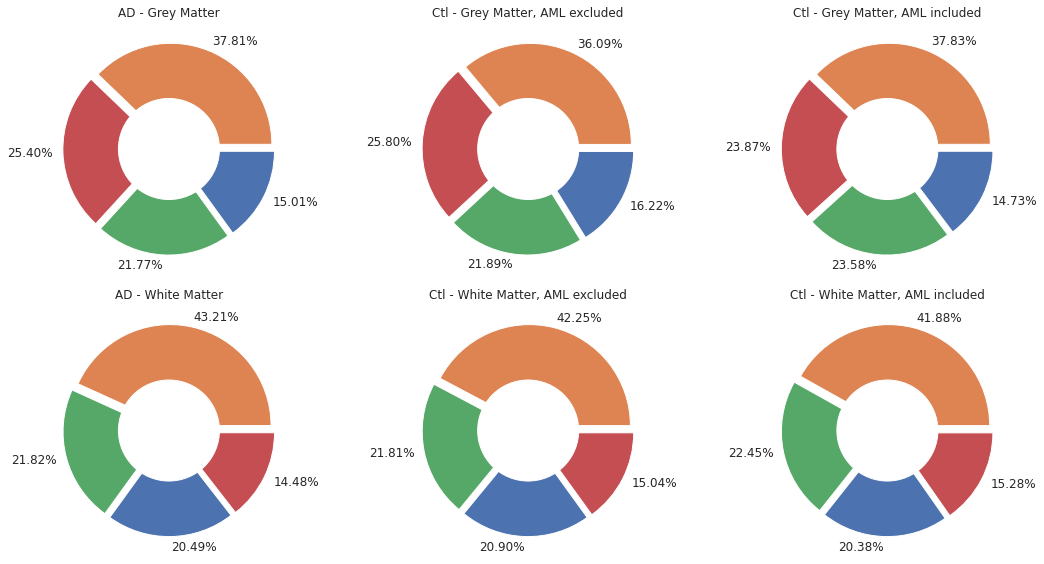

In [391]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,3,figsize=(16,8))
adataScaled2 = mDta[mDta.obs.ImageType=='AD'].copy()
plotPie(adataScaled2, ax, 0, 'leidenM1')
ax[0][0].set_title('AD - Grey Matter')
ax[1][0].set_title('AD - White Matter')
plt.tight_layout()

# exclude Ctl-2 sample, which corresponds to a patient with AML
adataScaled2 = mDta[mDta.obs.ImageID.isin(['Ctl-1','Ctl-3','Ctl-4'])].copy()
plotPie(adataScaled2, ax, 1,'leidenM1')
ax[0][1].set_title('Ctl - Grey Matter, AML excluded')
ax[1][1].set_title('Ctl - White Matter, AML excluded')

# plot for all control samples
adataScaled2 = mDta[mDta.obs.ImageType=='Ctl'].copy()
plotPie(adataScaled2, ax, 2,'leidenM1')
ax[0][2].set_title('Ctl - Grey Matter, AML included')
ax[1][2].set_title('Ctl - White Matter, AML included')
plt.tight_layout()

In [392]:
## Plot AD statistics
dt = 'Distance to nearest Plaque (µm)'
ss = mDta[(mDta.obs.ImageType =='AD')]
#ss = ss[ss.obs.Parent=='Grey Matter']
BINS  =[-1,0,5,10,15,20,30,50,75,100,200,500]
out = pd.cut(ss.obs[dt],bins=BINS, right=True)
ss.obs['Quantile'] = out.values

Trying to set attribute `.obs` of view, copying.


In [393]:
out = pd.qcut(ss.obs[dt], 10)
ss.obs['Quantile'] = out.values

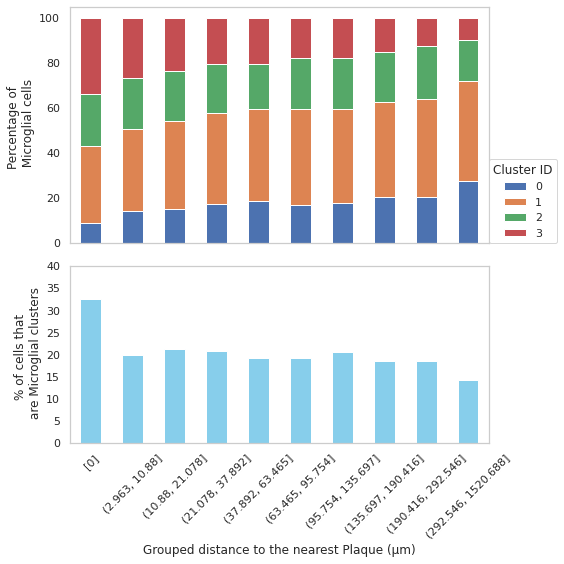

In [394]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [1.6,1.2]})

matpl=sc.pl.matrixplot(ss, var_names = mDta.var_names,groupby='Quantile',show=False,vmin=-0.5, vmax=0.75,vcenter=0,
                 dendrogram=False, use_raw=False, cmap="inferno",standard_scale=None,return_fig=True,swap_axes=True)
matpl.legend(show=False)

import numpy as np
sns.set_style("whitegrid", {'axes.grid' : False})


oDF = ss.obs.groupby(['Quantile','leidenM1','ImageID']).size().T.reset_index().groupby(['Quantile','leidenM1']).mean().unstack(level=1).T.reset_index(drop=True)
oDFPct = 100*oDF/oDF.sum(axis=0)

oDFPct.T.plot(kind='bar',stacked=True,ax=ax[0],color=cMapDict, legend=True, )
ax[0].legend(title='Cluster ID',loc=(1,0.0))
ax[0].set_ylabel('Percentage of \n Microglial cells')
ax[0].set_xlabel('')
ax[0].set_xticks([])



# find MG dections that are clusters
oDF =100.*ss.obs[ss.obs['numCellCentroids']>1].groupby(['Quantile'])[['numCellCentroids']].size()/ss.obs.groupby(['Quantile'])[['numCellCentroids']].size()

oDFPct = oDF.T#/oDF.sum(axis=1)
oDFPct.T.plot(kind='bar',stacked=True,ax=ax[1], legend=False, color='skyblue')
ax[1].set_ylabel('% of cells that \n are Microglial clusters')
ax[1].set_xlabel('Grouped distance to the nearest Plaque (µm)')
ax[1].set_xticklabels(['[0]']+ax[1].get_xticklabels()[1:],rotation = 45)
ax[1].set_ylim(0,40)

plt.tight_layout()

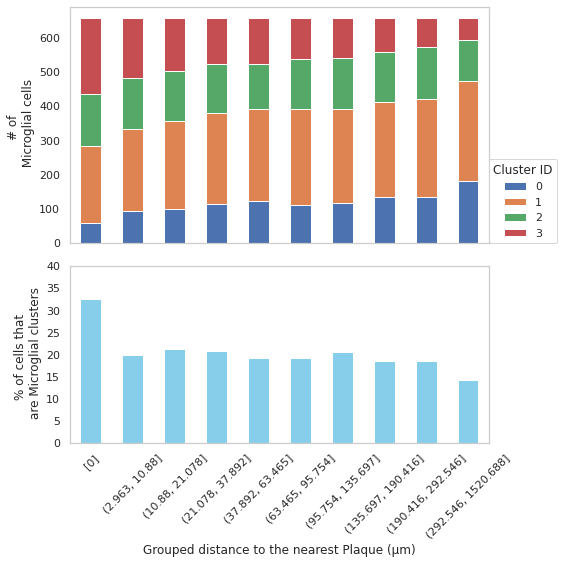

In [395]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [1.6,1.2]})

matpl=sc.pl.matrixplot(ss, var_names = mDta.var_names,groupby='Quantile',show=False,vmin=-0.5, vmax=0.75,vcenter=0,
                 dendrogram=False, use_raw=False, cmap="inferno",standard_scale=None,return_fig=True,swap_axes=True)
matpl.legend(show=False)

import numpy as np
sns.set_style("whitegrid", {'axes.grid' : False})


oDF = ss.obs.groupby(['Quantile','leidenM1','ImageID']).size().T.reset_index().groupby(['Quantile','leidenM1']).mean().unstack(level=1).T.reset_index(drop=True)
oDFPct = oDF#/oDF.sum(axis=0)

oDFPct.T.plot(kind='bar',stacked=True,ax=ax[0],color=cMapDict, legend=True, )
ax[0].legend(title='Cluster ID',loc=(1,0.0))
ax[0].set_ylabel('# of \n Microglial cells')
ax[0].set_xlabel('')
ax[0].set_xticks([])



# find MG dections that are clusters
oDF =100.*ss.obs[ss.obs['numCellCentroids']>1].groupby(['Quantile'])[['numCellCentroids']].size()/ss.obs.groupby(['Quantile'])[['numCellCentroids']].size()

oDFPct = oDF.T#/oDF.sum(axis=1)
oDFPct.T.plot(kind='bar',stacked=True,ax=ax[1], legend=False, color='skyblue')
ax[1].set_ylabel('% of cells that \n are Microglial clusters')
ax[1].set_xlabel('Grouped distance to the nearest Plaque (µm)')
ax[1].set_xticklabels(['[0]']+ax[1].get_xticklabels()[1:],rotation = 45)
ax[1].set_ylim(0,40)

plt.tight_layout()

(0.0, 1000.0)

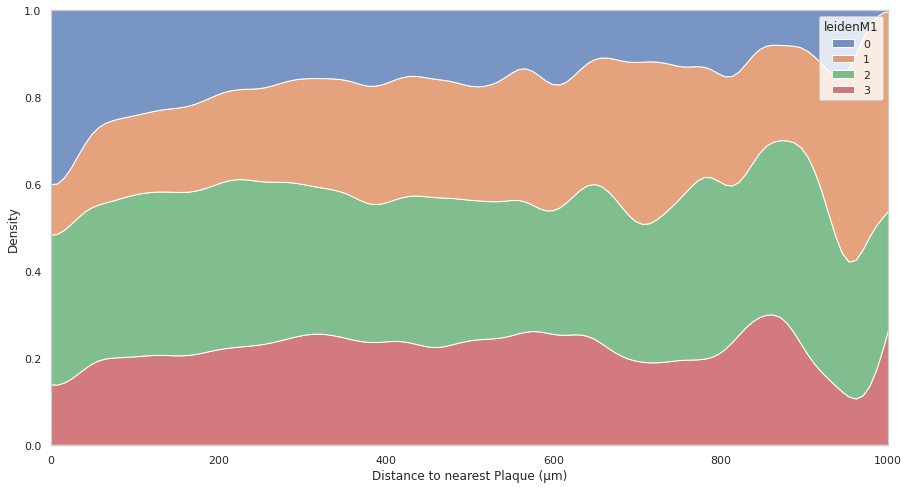

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(15,8))
sns.kdeplot(data=ss.obs, x=dt,hue='leidenM1',multiple="fill",ax=ax)
ax.set_xlim(0,1000)

<AxesSubplot:>

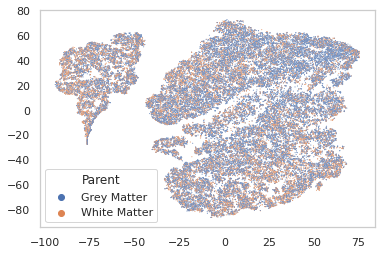

In [396]:
sns.scatterplot(data=mDta.obs, x=mDta.obsm['X_tsne'][:,0], y=mDta.obsm['X_tsne'][:,1],
                hue='Parent',s=1,)

<AxesSubplot:>

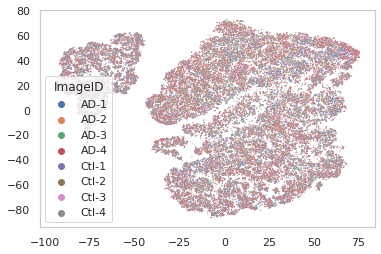

In [397]:
sns.scatterplot(data=mDta.obs, x=mDta.obsm['X_tsne'][:,0], y=mDta.obsm['X_tsne'][:,1],
                hue='ImageID',s=1,)

In [398]:
import tifffile as tf
def getCrop(inM, keepID):
    # Find the coordinates of all non-zero pixels with the specified keepID
    non_zero_coords = np.argwhere(inM == keepID)
    # Extract the minimum and maximum x and y coordinates
    x_min, y_min = np.min(non_zero_coords, axis=0)
    x_max, y_max = np.max(non_zero_coords, axis=0)
    # Calculate width (w) and height (h) based on the min and max coordinates
    # pad by 50
    pad = 50
    #w = x_max - x_min + pad
    #h = y_max - y_min + pad
    
    return (inM[max(0,x_min-pad):min(x_max+pad, inM.shape[0]), max(y_min-pad,0):min(y_max+pad, inM.shape[1])]==keepID).astype(np.uint8)
def getInputs(imID):
    #print(f"Reading image file: Bahareh/GMask/{imID}_labeledMG.tif" )
    inImg = tf.TiffFile(f'Bahareh/GMask/{imID}_labeledMG.tif').pages[0].asarray()
    return inImg

In [ ]:
Im1796 = getInputs('1796')

Reading image file: ../Bahareh/GMask/1796_labeledMG.tif


In [399]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity



def getSampleImages(adata):
    adata = adata[adata.obs.numCellCentroids==1]
    # calculate the average expression of each gene in each cluster
    cluster_means = {}
    for clusterID in np.unique(adata.obs['leidenM1']):
        cluster_cells = adata[adata.obs['leidenM1'] == clusterID].X.toarray()
        cluster_mean = np.mean(cluster_cells, axis=0)
        cluster_means[clusterID] = cluster_mean

    # sample four cells that are most representative of each cluster
    fig, ax = plt.subplots(4,4,figsize=(16,16))
    for ia, (clusterID, cluster_mean) in enumerate(cluster_means.items()):
        print(f"Cluster ID: {clusterID}")
        cellIDs = adata[adata.obs['leidenM1'] == clusterID].X.toarray()
        similarities = cosine_similarity(cellIDs, cluster_mean.reshape(1, -1))
        cellIDs = adata.obs[(adata.obs.leidenM1==clusterID)].iloc[np.argsort(similarities.ravel())[-4:]].ImageID_CellID.values[::-1]
        print(cellIDs)
        for ix,cID in enumerate(cellIDs):
            inIm = getInputs(cID.split('_')[0])
            inIm = getCrop(inIm, int(cID.split('_')[1]))
            ax[ia][ix].imshow(inIm)
            ax[ia][ix].set_title(f"{clusterID}_{cID}")
    

Cluster ID: 0
['1796_4733' '3196_6844' '1873_12319' '3155_15658']
Cluster ID: 1
['3280_9657' '3628_10619' '3196_6691' '1873_4743']
Cluster ID: 2
['3280_15644' '2997_10739' '1796_7248' '1873_4648']
Cluster ID: 3
['3280_21859' '3196_3377' '3628_14092' '3280_19904']


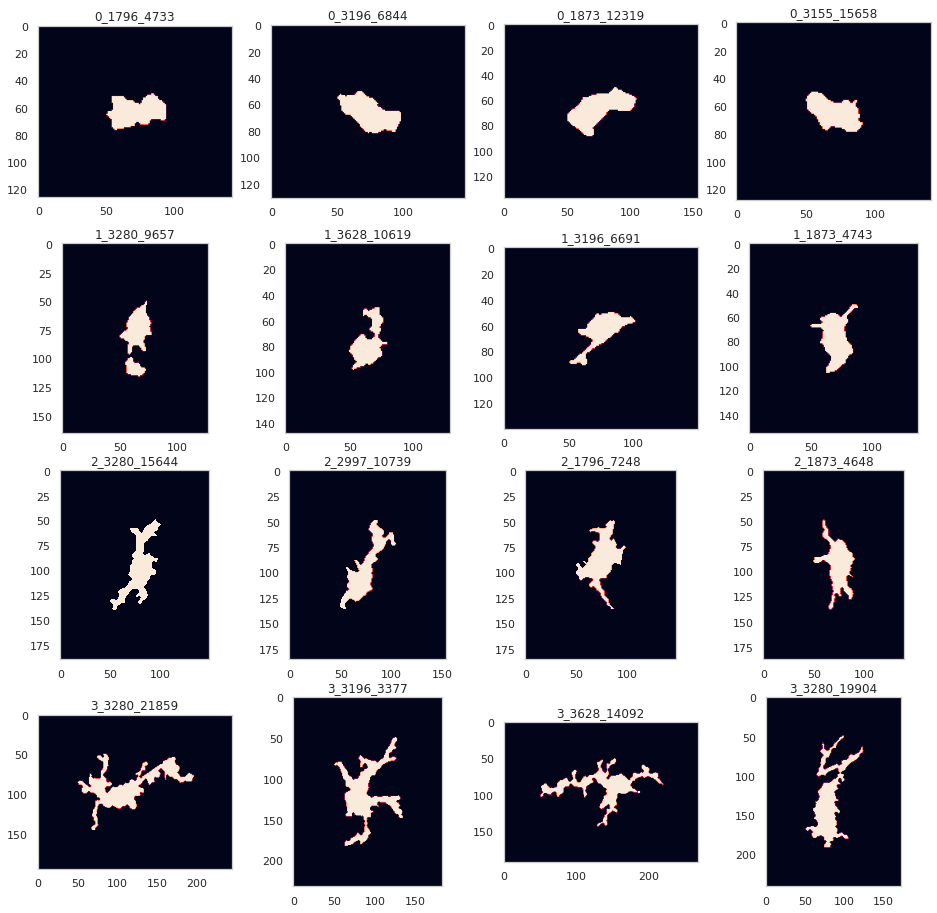

In [400]:
getSampleImages(mDta)

Reading image file: ../Bahareh/GMask/3155_labeledMG.tif
Reading image file: ../Bahareh/GMask/3026_labeledMG.tif
Reading image file: ../Bahareh/GMask/3280_labeledMG.tif
Reading image file: ../Bahareh/GMask/3196_labeledMG.tif


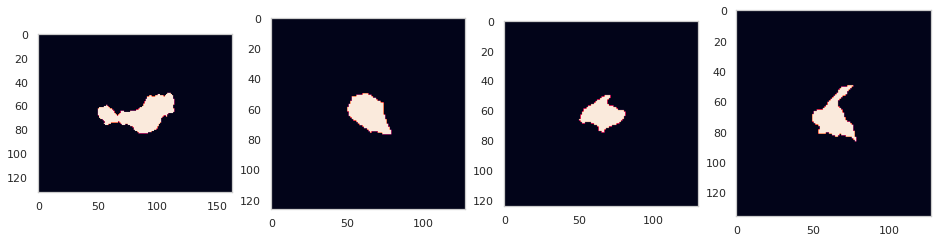

In [245]:
getSampleImages(mDta, 1)

Reading image file: ../Bahareh/GMask/3026_labeledMG.tif
Reading image file: ../Bahareh/GMask/3280_labeledMG.tif
Reading image file: ../Bahareh/GMask/3026_labeledMG.tif
Reading image file: ../Bahareh/GMask/3155_labeledMG.tif


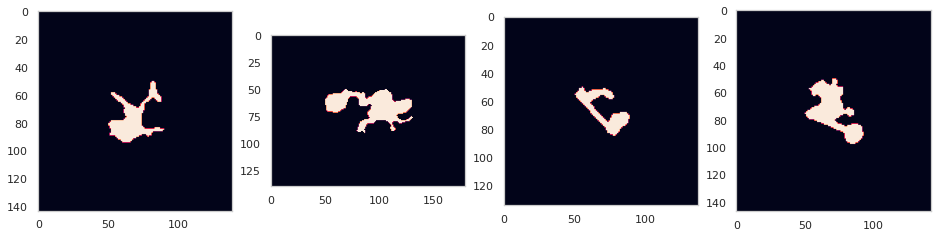

In [246]:
getSampleImages(mDta, 2)

Reading image file: ../Bahareh/GMask/3280_labeledMG.tif
Reading image file: ../Bahareh/GMask/3628_labeledMG.tif
Reading image file: ../Bahareh/GMask/2997_labeledMG.tif
Reading image file: ../Bahareh/GMask/1796_labeledMG.tif


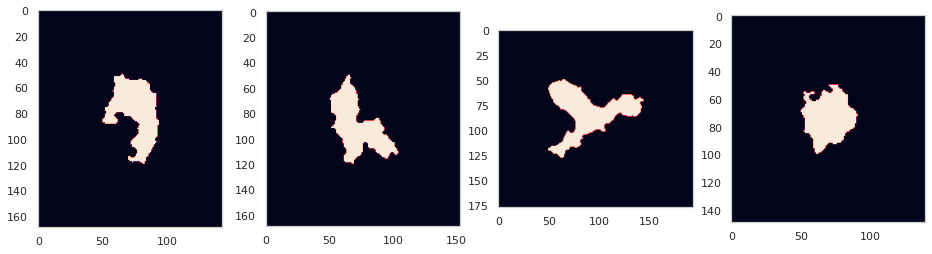

In [247]:
getSampleImages(mDta, 3)

In [270]:
aDta.obs.index = aDta.obs.ImageID_CellID.values

In [271]:
combinedAD = sc.concat([mDta, aDta],axis=1)

In [272]:
combinedAD.obs = mDta.obs.copy()

AnnData object with n_obs × n_vars = 48146 × 21
    var: 'mean', 'std'
    varm: 'PCs'

In [ ]:
combinedAD

In [275]:
sc.tl.pca(combinedAD, svd_solver='arpack') # peform PCA


In [282]:
sc.tl.tsne(combinedAD, perplexity=100)

In [276]:

# compute clustering phenotypes
# uses RapidsAI to speed-up the computation
import Bahareh.rapids_scanpy_funcs as rs

sc.pp.neighbors(combinedAD, n_neighbors=100, method='rapids') # Computing the neighborhood graph

In [344]:
combinedAD.obs['leidenME'] = rs.leiden(combinedAD, resolution=0.5)
combinedAD.obs['leidenME1'] = rs.leiden(combinedAD, resolution=0.5)

<AxesSubplot:>

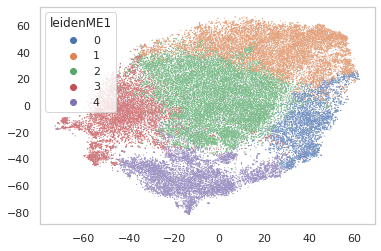

In [345]:
sns.scatterplot(data=combinedAD.obs, x=combinedAD.obsm['X_tsne'][:,0], y=combinedAD.obsm['X_tsne'][:,1],
                hue='leidenME1',s=1,)

<AxesSubplot:>

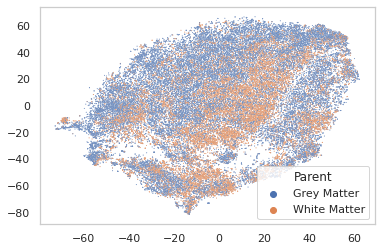

In [346]:
sns.scatterplot(data=combinedAD.obs, x=combinedAD.obsm['X_tsne'][:,0], y=combinedAD.obsm['X_tsne'][:,1],
                hue='Parent',s=1,)


<AxesSubplot:>

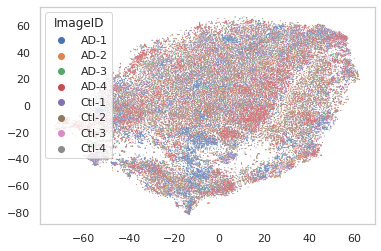

In [347]:

sns.scatterplot(data=combinedAD.obs, x=combinedAD.obsm['X_tsne'][:,0], y=combinedAD.obsm['X_tsne'][:,1],
                hue='ImageID',s=1,)

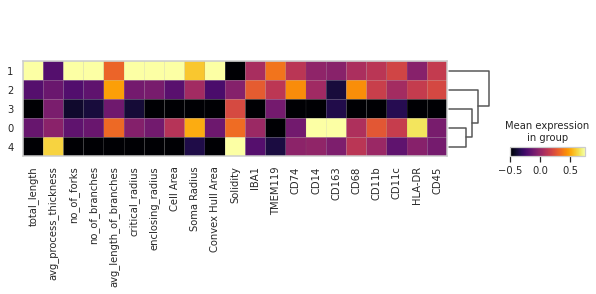

In [348]:
# Plot heatmap

sc.tl.dendrogram(combinedAD, groupby='leidenME1')
sc.pl.matrixplot(combinedAD, var_names = combinedAD.var_names,groupby='leidenME1', 
                 dendrogram=True, use_raw=False, cmap="inferno",standard_scale=None,vmin=-0.50,vmax=0.75, return_fig=False)

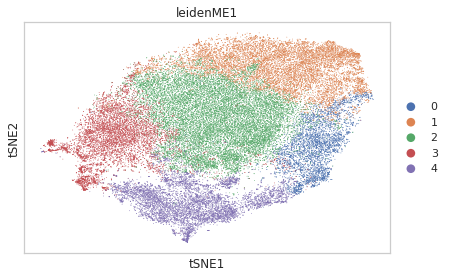

In [349]:
sc.pl.scatter(combinedAD,basis ='tsne', color='leidenME1')
cMapDict = {ix:x for ix,x in enumerate(combinedAD.uns['leidenME1_colors'])}


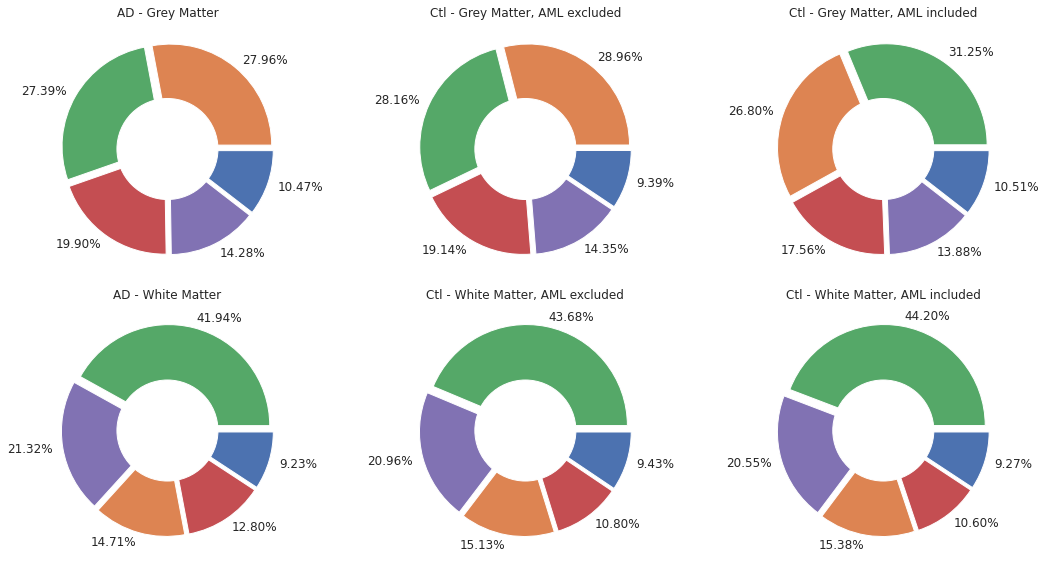

In [350]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,3,figsize=(16,8))
adataScaled2 = combinedAD[combinedAD.obs.ImageType=='AD'].copy()
plotPie(adataScaled2, ax, 0, 'leidenME1')
ax[0][0].set_title('AD - Grey Matter')
ax[1][0].set_title('AD - White Matter')
plt.tight_layout()

# exclude Ctl-2 sample, which corresponds to a patient with AML
adataScaled2 = combinedAD[combinedAD.obs.ImageID.isin(['Ctl-1','Ctl-3','Ctl-4'])].copy()
plotPie(adataScaled2, ax, 1,'leidenME1')
ax[0][1].set_title('Ctl - Grey Matter, AML excluded')
ax[1][1].set_title('Ctl - White Matter, AML excluded')

# plot for all control samples
adataScaled2 = combinedAD[combinedAD.obs.ImageType=='Ctl'].copy()
plotPie(adataScaled2, ax, 2,'leidenME1')
ax[0][2].set_title('Ctl - Grey Matter, AML included')
ax[1][2].set_title('Ctl - White Matter, AML included')
plt.tight_layout()

In [354]:
## Plot AD statistics
dt = 'Distance to nearest Plaque (µm)'
ss = combinedAD[(combinedAD.obs.ImageType =='AD')]
ss = ss[ss.obs.Parent=='Grey Matter']
# BINS  =[-1,0,5,10,15,20,30,50,75,100,200,500]
# out = pd.cut(ss.obs[dt],bins=BINS, right=True)
# ss.obs['Quantile'] = out.values

In [355]:
out = pd.qcut(ss.obs[dt], 11, duplicates='drop')
ss.obs['Quantile'] = out.values

Trying to set attribute `.obs` of view, copying.


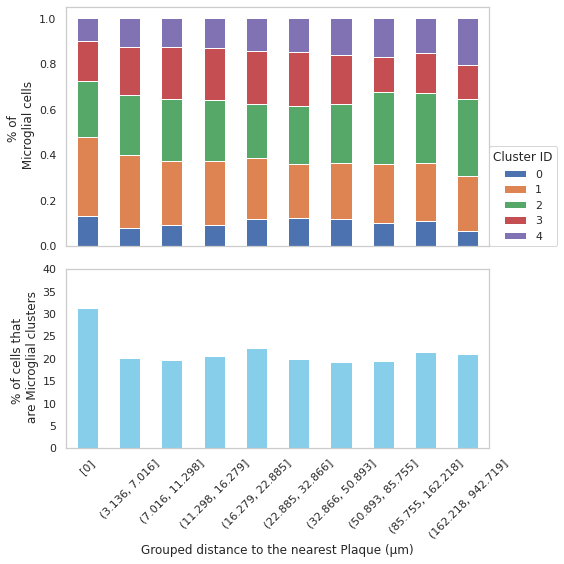

In [358]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [1.6,1.2]})

matpl=sc.pl.matrixplot(ss, var_names = mDta.var_names,groupby='Quantile',show=False,vmin=-0.5, vmax=0.75,vcenter=0,
                 dendrogram=False, use_raw=False, cmap="inferno",standard_scale=None,return_fig=True,swap_axes=True)
matpl.legend(show=False)

import numpy as np
sns.set_style("whitegrid", {'axes.grid' : False})


oDF = ss.obs.groupby(['Quantile','leidenME1','ImageID']).size().T.reset_index().groupby(['Quantile','leidenME1']).mean().unstack(level=1).T.reset_index(drop=True)
oDFPct = oDF/oDF.sum(axis=0)

oDFPct.T.plot(kind='bar',stacked=True,ax=ax[0],color=cMapDict, legend=True, )
ax[0].legend(title='Cluster ID',loc=(1,0.0))
ax[0].set_ylabel('% of \n Microglial cells')
ax[0].set_xlabel('')
ax[0].set_xticks([])



# find MG dections that are clusters
oDF =100.*ss.obs[ss.obs['numCellCentroids']>1].groupby(['Quantile'])[['numCellCentroids']].size()/ss.obs.groupby(['Quantile'])[['numCellCentroids']].size()

oDFPct = oDF.T#/oDF.sum(axis=1)
oDFPct.T.plot(kind='bar',stacked=True,ax=ax[1], legend=False, color='skyblue')
ax[1].set_ylabel('% of cells that \n are Microglial clusters')
ax[1].set_xlabel('Grouped distance to the nearest Plaque (µm)')
ax[1].set_xticklabels(['[0]']+ax[1].get_xticklabels()[1:],rotation = 45)
ax[1].set_ylim(0,40)

plt.tight_layout()

In [407]:
mDta.obs

,spatial_X,spatial_Y,Area,Area (µm^2),ImageID,ImageType,Parent,Distance to nearest Plaque (µm),no_of_secondary_branches,no_of_tertiary_branches,...,numCellCentroids,ImageIDOLD,CellID,coefficient_of_determination,critical_value,sholl_regression_coefficient,regression_intercept,leiden,leidenM,leidenM1
1796_1791,13574.364621,11980.732852,277,61.1722,Ctl-3,Ctl,Grey Matter,348.1208,0.0,0.0,...,1.0,1796,1791,0.98,1.92,1.15,-1.35,3,0,0
1796_1795,13491.046358,11876.990066,302,53.9108,Ctl-3,Ctl,Grey Matter,308.6889,0.0,0.0,...,1.0,1796,1795,1.00,2.00,1.00,-1.14,3,0,0
1796_1796,14676.054795,11854.070776,438,82.4693,Ctl-3,Ctl,Grey Matter,432.9919,0.0,0.0,...,1.0,1796,1796,0.97,2.08,0.13,-2.03,2,1,1
1796_1797,13395.029412,11854.349790,952,185.9480,Ctl-3,Ctl,Grey Matter,303.5456,2.0,0.0,...,1.0,1796,1797,0.95,4.26,1.68,0.86,3,2,2
1796_1798,15292.282609,11814.693237,828,171.9872,Ctl-3,Ctl,Grey Matter,353.9196,4.0,2.0,...,1.0,1796,1798,0.83,3.50,1.03,-0.97,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628_19351,39.883575,15885.947766,1589,269.7662,Ctl-2,Ctl,White Matter,NaN,2.0,2.0,...,1.0,3628,19351,0.89,2.09,1.14,-0.90,6,1,1
3628_19352,331.334215,15758.689594,1134,204.2505,Ctl-2,Ctl,White Matter,NaN,2.0,0.0,...,1.0,3628,19352,0.94,3.49,0.07,-2.26,2,2,2
3628_19355,140.715271,15603.225616,1015,172.7699,Ctl-2,Ctl,White Matter,NaN,0.0,0.0,...,1.0,3628,19355,0.91,3.15,0.11,-2.05,1,1,1
3628_19356,129.878453,15529.645304,1810,347.2530,Ctl-2,Ctl,White Matter,NaN,4.0,6.0,...,1.0,3628,19356,0.96,5.19,0.06,-2.11,6,2,3


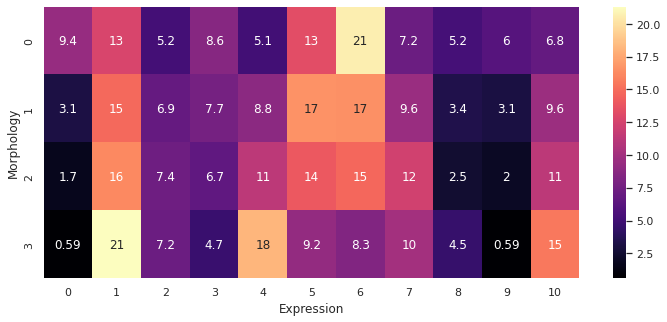

In [416]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create a sample DataFrame with two columns


# compute the confusion matrix
confusion_matrix = pd.crosstab(mDta.obs['leidenM1'], mDta.obs['leiden'], rownames=['Morphology'], colnames=['Expression'])
confusion_matrix_norm = 100*confusion_matrix.div(confusion_matrix.sum(axis=1), axis=0)

# plot the confusion matrix as a heatmap
plt.figure(figsize=(12,5))
sns.heatmap(confusion_matrix_norm, annot=True, cmap='magma', )
plt.show()

In [419]:
mDta.obs.drop('leidenM', axis=1, inplace=True)

In [420]:
mDta.obs

,spatial_X,spatial_Y,Area,Area (µm^2),ImageID,ImageType,Parent,Distance to nearest Plaque (µm),no_of_secondary_branches,no_of_tertiary_branches,...,ImageID_CellID,numCellCentroids,ImageIDOLD,CellID,coefficient_of_determination,critical_value,sholl_regression_coefficient,regression_intercept,leiden,leidenM1
1796_1791,13574.364621,11980.732852,277,61.1722,Ctl-3,Ctl,Grey Matter,348.1208,0.0,0.0,...,1796_1791,1.0,1796,1791,0.98,1.92,1.15,-1.35,3,0
1796_1795,13491.046358,11876.990066,302,53.9108,Ctl-3,Ctl,Grey Matter,308.6889,0.0,0.0,...,1796_1795,1.0,1796,1795,1.00,2.00,1.00,-1.14,3,0
1796_1796,14676.054795,11854.070776,438,82.4693,Ctl-3,Ctl,Grey Matter,432.9919,0.0,0.0,...,1796_1796,1.0,1796,1796,0.97,2.08,0.13,-2.03,2,1
1796_1797,13395.029412,11854.349790,952,185.9480,Ctl-3,Ctl,Grey Matter,303.5456,2.0,0.0,...,1796_1797,1.0,1796,1797,0.95,4.26,1.68,0.86,3,2
1796_1798,15292.282609,11814.693237,828,171.9872,Ctl-3,Ctl,Grey Matter,353.9196,4.0,2.0,...,1796_1798,1.0,1796,1798,0.83,3.50,1.03,-0.97,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628_19351,39.883575,15885.947766,1589,269.7662,Ctl-2,Ctl,White Matter,NaN,2.0,2.0,...,3628_19351,1.0,3628,19351,0.89,2.09,1.14,-0.90,6,1
3628_19352,331.334215,15758.689594,1134,204.2505,Ctl-2,Ctl,White Matter,NaN,2.0,0.0,...,3628_19352,1.0,3628,19352,0.94,3.49,0.07,-2.26,2,2
3628_19355,140.715271,15603.225616,1015,172.7699,Ctl-2,Ctl,White Matter,NaN,0.0,0.0,...,3628_19355,1.0,3628,19355,0.91,3.15,0.11,-2.05,1,1
3628_19356,129.878453,15529.645304,1810,347.2530,Ctl-2,Ctl,White Matter,NaN,4.0,6.0,...,3628_19356,1.0,3628,19356,0.96,5.19,0.06,-2.11,6,3


In [422]:
mDta.write_h5ad('Bahareh/data/MGCells_Morph.h5ad')

In [423]:
ad.__version__


'0.7.8'

In [424]:
!pip install forest-fire-clustering


In [425]:
fcc.preprocess()

AnnData object with n_obs × n_vars = 48146 × 10
    obs: 'spatial_X', 'spatial_Y', 'Area', 'Area (µm^2)', 'ImageID', 'ImageType', 'Parent', 'Distance to nearest Plaque (µm)', 'ImageID_CellID', 'numCellCentroids', 'leiden', 'leidenM1'
    var: 'mean', 'std'
    uns: 'neighbors', 'pca', 'tsne', 'dendrogram_leidenM1'
    obsm: 'X_pca', 'X_spatial', 'X_tsne'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [440]:
from forest_fire_clustering.forest_fire_clustering import FFC

ffc = FFC(n_neighbors=100, n
ffc.preprocess(aDta.obsm["X_tsne"])
ffc.fit(fire_temp=50)
aDta.obs["ffc"] = ffc.cluster_labels

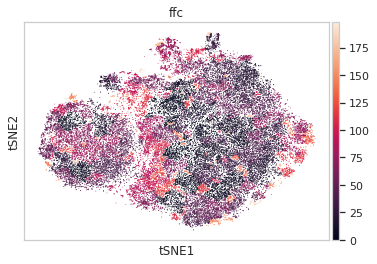

In [441]:
sc.pl.tsne(aDta, color=["ffc"])


In [442]:
# Internal validation
ffc.validate()
ffc.entropy()
ffc.pval()

MC iteration 0
MC iteration 100
MC iteration 200
MC iteration 300
MC iteration 400


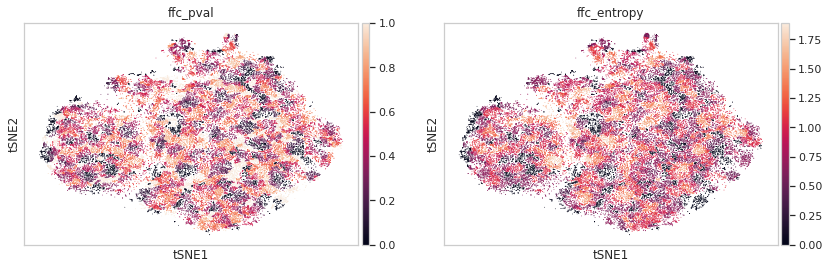

In [443]:

aDta.obs["ffc_pval"] = ffc.pval_list
aDta.obs["ffc_entropy"] = ffc.entropy_list
sc.pl.tsne(aDta, color=["ffc_pval", "ffc_entropy"])